# Exploratory Data Analysis: Census Data Income

## Importing Data and Libraries

In [10]:
# Importation: Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
# Importation: data set [ https://archive.ics.uci.edu/dataset/20/census+income ]
# pip install ucimlrepo
from ucimlrepo import fetch_ucirepo  
census_income = fetch_ucirepo(id=20)    # fetch dataset

# read data (as pandas dataframes) 
X = census_income.data.features 
y = census_income.data.targets 

# Variables overview
print(census_income.variables)

              name     role         type      demographic  \
0              age  Feature      Integer              Age   
1        workclass  Feature  Categorical           Income   
2           fnlwgt  Feature      Integer             None   
3        education  Feature  Categorical  Education Level   
4    education-num  Feature      Integer  Education Level   
5   marital-status  Feature  Categorical            Other   
6       occupation  Feature  Categorical            Other   
7     relationship  Feature  Categorical            Other   
8             race  Feature  Categorical             Race   
9              sex  Feature       Binary              Sex   
10    capital-gain  Feature      Integer             None   
11    capital-loss  Feature      Integer             None   
12  hours-per-week  Feature      Integer             None   
13  native-country  Feature  Categorical            Other   
14          income   Target       Binary           Income   

                       

## Exploratory Data Analysis

### Data: Overview

In [12]:
# Overview of information
print(census_income)

{'data': {'ids': None, 'features':        age         workclass  fnlwgt  education  education-num  \
0       39         State-gov   77516  Bachelors             13   
1       50  Self-emp-not-inc   83311  Bachelors             13   
2       38           Private  215646    HS-grad              9   
3       53           Private  234721       11th              7   
4       28           Private  338409  Bachelors             13   
...    ...               ...     ...        ...            ...   
48837   39           Private  215419  Bachelors             13   
48838   64               NaN  321403    HS-grad              9   
48839   38           Private  374983  Bachelors             13   
48840   44           Private   83891  Bachelors             13   
48841   35      Self-emp-inc  182148  Bachelors             13   

           marital-status         occupation    relationship  \
0           Never-married       Adm-clerical   Not-in-family   
1      Married-civ-spouse    Exec-managerial

This dataset contains census data, and uses the data to predict whether or not an individual exceeds $50,000 USD per year.
Income is a binary target field, denoting whether or not the associated person's income exceeds $50,000 per year or not.
Variables considered include demographic data regarding one's sex, native country, race and age, relationship data: namely one's marital status and role in a relationship (are they a husband, a wife, not in a nuclear family, etc), education and employment data: highest level of education, occupation, working class.

Aside from the binary indication of whether or not one's income exceeds $50K per year, the variables capital gain and capital loss provide greater insight into one's financial situation, by showing how much an individual earns and loses. This information is useful when evaluating differences in income in a non-binary manner.

### Data: Key Variables

In [80]:
# Display variable information
pd.set_option('display.max_rows', 15)
print("--------- Key variables ---------")
print(census_income.variables.name)

print()
print("--------- Variables relate to ---------")
print(census_income.variables.demographic)

print()
print("--------- Data type of each variable ---------")
print(census_income.variables.type)

--------- Key variables ---------
0                age
1          workclass
2             fnlwgt
3          education
4      education-num
5     marital-status
6         occupation
7       relationship
8               race
9                sex
10      capital-gain
11      capital-loss
12    hours-per-week
13    native-country
14            income
Name: name, dtype: object

--------- Variables relate to ---------
0                 Age
1              Income
2                None
3     Education Level
4     Education Level
5               Other
6               Other
7               Other
8                Race
9                 Sex
10               None
11               None
12               None
13              Other
14             Income
Name: demographic, dtype: object

--------- Data type of each variable ---------
0         Integer
1     Categorical
2         Integer
3     Categorical
4         Integer
5     Categorical
6     Categorical
7     Categorical
8     Categorical
9          

# Hypothesis Formulation

#### Hypothesis 1: There exists a correlation between education level and income

[Text(0, 0, 'Bachelors'),
 Text(1, 0, 'HS-grad'),
 Text(2, 0, '11th'),
 Text(3, 0, 'Masters'),
 Text(4, 0, '9th'),
 Text(5, 0, 'Some-college'),
 Text(6, 0, 'Assoc-acdm'),
 Text(7, 0, 'Assoc-voc'),
 Text(8, 0, '7th-8th'),
 Text(9, 0, 'Doctorate'),
 Text(10, 0, 'Prof-school'),
 Text(11, 0, '5th-6th'),
 Text(12, 0, '10th'),
 Text(13, 0, '1st-4th'),
 Text(14, 0, 'Preschool'),
 Text(15, 0, '12th')]

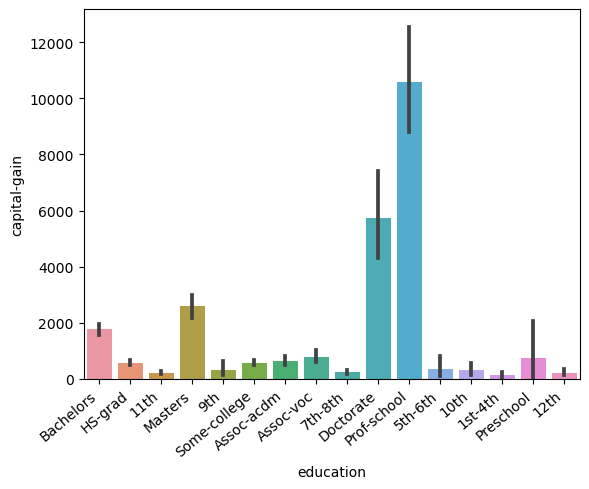

In [82]:
# Representing the relationship between education level and capital gain
# sns.countplot(data=census_income, x='income')
bar = sns.barplot(data=X, x="education", y="capital-gain")
bar.set_xticklabels(bar.get_xticklabels(), rotation=40, ha="right")

##### Report on education level and income relationship
Data indicates that those with education level exceeding high school earn more than those without a degree. 
Amongst the top three earning education levels: professional school, doctorate, and master's degree, significant differences in capital gain exist between the groups. Capital gain amongst those without collegiate degrees is low, and relatively comparable across groups. 

The data indicates that a positive relationship exists between one's education level and capital gain. Possession of a degree is a major indicator of in one's level of capital gain, with the type of degree being the most significant differentiating factor of one's capital gain level, amongst degree-holding individuals.

#### Hypothesis 2: There exists a relationship between income, sex, and familial status

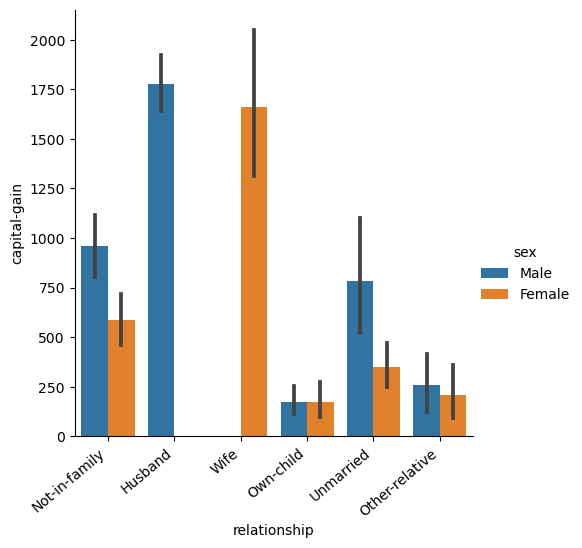

In [78]:
plot2 = sns.catplot(data=X, x="relationship", y="capital-gain", hue="sex", kind="bar")
plot2.set_xticklabels(rotation=40, ha="right")

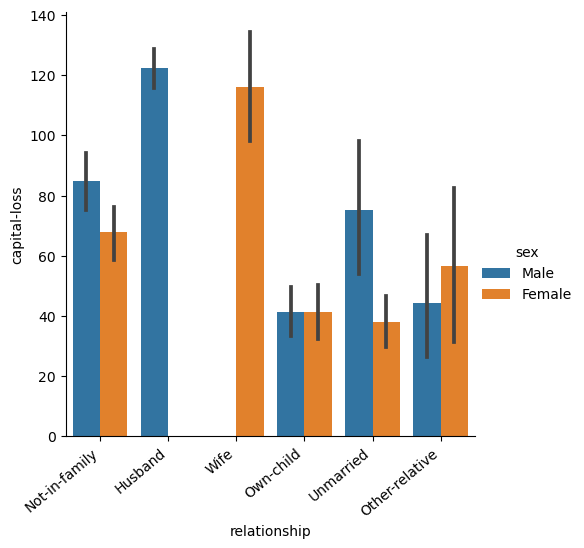

In [79]:
plot3 = sns.catplot(data=X, x="relationship", y="capital-loss", hue="sex", kind="bar")
plot3.set_xticklabels(rotation=40, ha="right")

##### Report on relationship between sex, marital status and income
The data reveals that married individuals gain more capital relative to those who are not in a marital arrangement.
Husbands exceed wives in capital gain, and even in unmarried relationship situations: being unmarried, or not being in a family, men are more likely to have a higher capital gain than women.

This relationship holds for capital loss: married persons have higher capital loss on average than unmarried persons, and men have higher capital loss on average than women. This stands to reason, as gaining more capital implies there is more capital available to be lost.

This data suggests that men, on average, earn higher than their female counterparts regardless of marital status. It further indicates that being married is a key indicator of being a relatively high earner. This could imply that a marriage supports accumulation of capital wealth, or that those with high capital gain can more comfortably support a marriage.

## Conclusions

##### Hypothesis 1
The data in the Hypothesis 1 section validates my first hypthesis, that income and education are correlated. Those with more advanced degrees tend to earn more capital gain on average.

##### Hypothesis 2
The data in the Hypothesis 2 section indicates that my hypothesis that a relationship exists between sex, income and familial status has merit. Men tend to gain more capital than women on average, regardless of marital status. Married individuals tend to earn significantly more capital per year than un-married persons.